In [65]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import darts
from darts import metrics 
from matplotlib import pyplot as plt
from darts.models import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from itertools import product
import math

## Time series 
1. Download a price timeseries using an API. The length of the timeseries T, with T=300. The resolution could be any, from tick data to months.  

2. Plot the price time series

In [2]:
#1
def get_stock_data(ticker='AAPL', reset_index = False):
    """ 
    
    """
    end_date = datetime.date.today()
    start_date = end_date + datetime.timedelta(days=-500)
    df = yf.download(tickers=ticker, start=start_date, end=end_date)
    df = df.iloc[-300:,:]
    df.columns = [col + ' Price' for col in df.columns]
    df['Date'] = df.index
    
    if reset_index:
        df = df.reset_index(drop=True)    
    
    return df

In [3]:
def plot_time_series_annotated(df, ylabel,x_col='Date', y_cols=['Close Price'], title='Apple', facecolor='whitesmoke'):
    
    cmap = plt.cm.get_cmap('Set1', len(y_cols))
    fig, ax = plt.subplots(figsize=(14,4))
    
    ax.set_facecolor(facecolor)
    
    for i, col in enumerate(y_cols):
        line_color = cmap(i)
        df.plot(x=x_col, y=col, grid=True, ax=ax, label=None, color=line_color)
        max_val = df[col].max()
        min_val = df[col].min()
        
      
        max_index = df.index[df[col] == max_val][0]
        min_index = df.index[df[col] == min_val][0]
        
        ax.plot(max_index, max_val, marker='^', markersize=8, color=line_color)
        ax.annotate(f"{max_val:.2f}\nhigh", xy=(max_index, max_val), xytext=(0, 10), 
                    textcoords='offset points', ha='center', fontsize=8, fontweight='light')
        
        ax.plot(min_index, min_val, marker='v', markersize=8, color=line_color)
        ax.annotate(f"{min_val:.2f}\nlow", xy=(min_index, min_val), xytext=(0, -20), 
                    textcoords='offset points', ha='center', fontsize=8, fontweight='light')
    
    plt.title(title, loc='center', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(x_col, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')
    ax.tick_params(axis='both', which='both', length=0)
    plt.tight_layout()
    plt.legend(loc='lower left')
    plt.show()

In [4]:
def plot_time_series_not_annotated(df, ylabel,x_col='Date', y_cols=['Close Price'], title='Apple', facecolor='whitesmoke',):
    
    cmap = plt.cm.get_cmap('Set1', len(y_cols))
    fig, ax = plt.subplots(figsize=(14,5))
    
    ax.set_facecolor(facecolor)
    
    for i, col in enumerate(y_cols):
        line_color = cmap(i)
        df.plot(x=x_col, y=col, grid=True, ax=ax, label=None, color=line_color)
   
    plt.title(title, loc='center', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(x_col, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')
    ax.tick_params(axis='both', which='both', length=0)
    plt.tight_layout()
    plt.legend(loc='lower left')
    plt.show()


In [5]:
aapl = get_stock_data()
aapl.shape
aapl.head()

[*********************100%***********************]  1 of 1 completed


/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3463903280.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df.index


,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume Price,Date
Date,,,,,,,
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.288162,108923700,2021-12-09
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.142532,115402700,2021-12-10
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.459564,153237000,2021-12-13
2021-12-14,175.250000,177.740005,172.210007,174.330002,173.059845,139380400,2021-12-14
2021-12-15,175.110001,179.500000,172.309998,179.300003,177.993607,131063300,2021-12-15


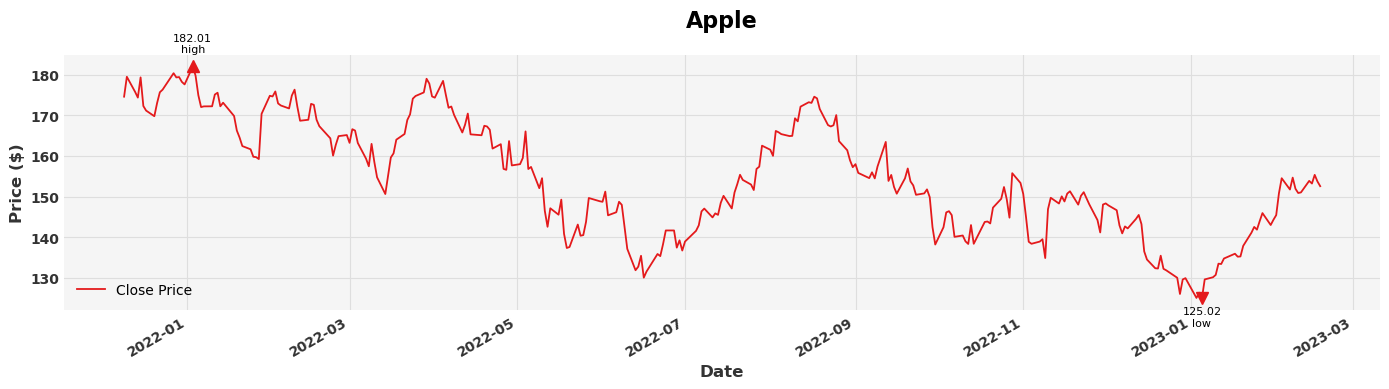

In [6]:
plot_time_series_annotated(aapl, x_col='Date', y_cols=['Close Price'], ylabel='Price ($)')


## Moving averages
3. Define mathematically the moving average of the price time series with an arbitrary time- window τ 

4. Compute three moving averages of the price timeseries, with time-windows τ=10,20,30 

5. Plot the moving averages against the price time series 

6. Compute the linear and log-return of the price time series 

7. Plot the linear return against the log-return time series

In [7]:
def moving_average(df, col, window_size):
    return df[col].rolling(window=window_size).mean()

def linear_return(df, col):
    return np.diff( df[col] ) / df[col][1:]

def log_return(df, col):
    return np.log( df[col].shift(1) / df[col] )

/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3494281586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Moving Avg 10']  = moving_average(aapl,'Close Price', 10)
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3494281586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Moving Avg 20']  = moving_average(aapl,'Close Price', 20)
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3494281586.py:3: SettingWithCopyWarning: 
A value is trying to 

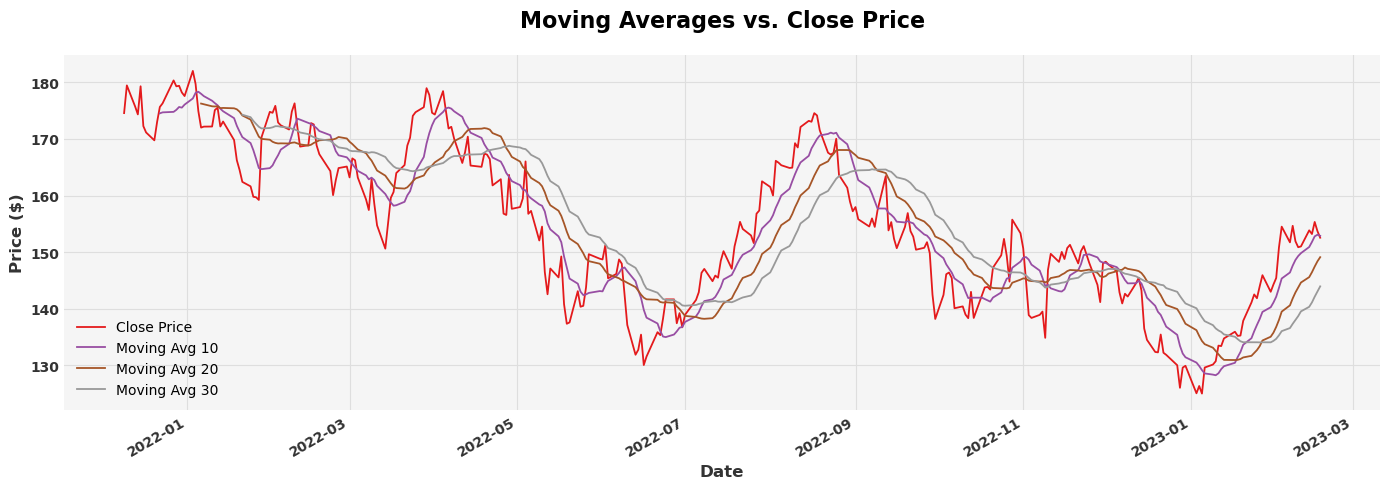

In [8]:
aapl['Moving Avg 10']  = moving_average(aapl,'Close Price', 10)
aapl['Moving Avg 20']  = moving_average(aapl,'Close Price', 20)
aapl['Moving Avg 30']  = moving_average(aapl,'Close Price', 30)

plot_time_series_not_annotated(aapl, x_col='Date', 
                y_cols=['Close Price', 'Moving Avg 10', 'Moving Avg 20', 'Moving Avg 30'], 
                title='Moving Averages vs. Close Price',
                ylabel = 'Price ($)')

In [9]:
aapl.head()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume Price,Date,Moving Avg 10,Moving Avg 20,Moving Avg 30
Date,,,,,,,,,,
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.288162,108923700,2021-12-09,NaN,NaN,NaN
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.142532,115402700,2021-12-10,NaN,NaN,NaN
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.459564,153237000,2021-12-13,NaN,NaN,NaN
2021-12-14,175.250000,177.740005,172.210007,174.330002,173.059845,139380400,2021-12-14,NaN,NaN,NaN
2021-12-15,175.110001,179.500000,172.309998,179.300003,177.993607,131063300,2021-12-15,NaN,NaN,NaN


In [10]:
aapl.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price',
       'Adj Close Price', 'Volume Price', 'Date', 'Moving Avg 10',
       'Moving Avg 20', 'Moving Avg 30'],
      dtype='object')

In [11]:
aapl['Linear Return'] = linear_return(aapl, 'Close Price')
aapl['Log Return'] = log_return(aapl, 'Close Price')
for col in ['Moving Avg 10', 'Moving Avg 20', 'Moving Avg 30']:
    aapl[f'{col} Linear Return'] = linear_return(aapl, col)
    aapl[f'{col} Log Return'] = log_return(aapl, col)

/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3438590042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Linear Return'] = linear_return(aapl, 'Close Price')
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3438590042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Log Return'] = log_return(aapl, 'Close Price')
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/3438590042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [12]:
aapl.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price',
       'Adj Close Price', 'Volume Price', 'Date', 'Moving Avg 10',
       'Moving Avg 20', 'Moving Avg 30', 'Linear Return', 'Log Return',
       'Moving Avg 10 Linear Return', 'Moving Avg 10 Log Return',
       'Moving Avg 20 Linear Return', 'Moving Avg 20 Log Return',
       'Moving Avg 30 Linear Return', 'Moving Avg 30 Log Return'],
      dtype='object')

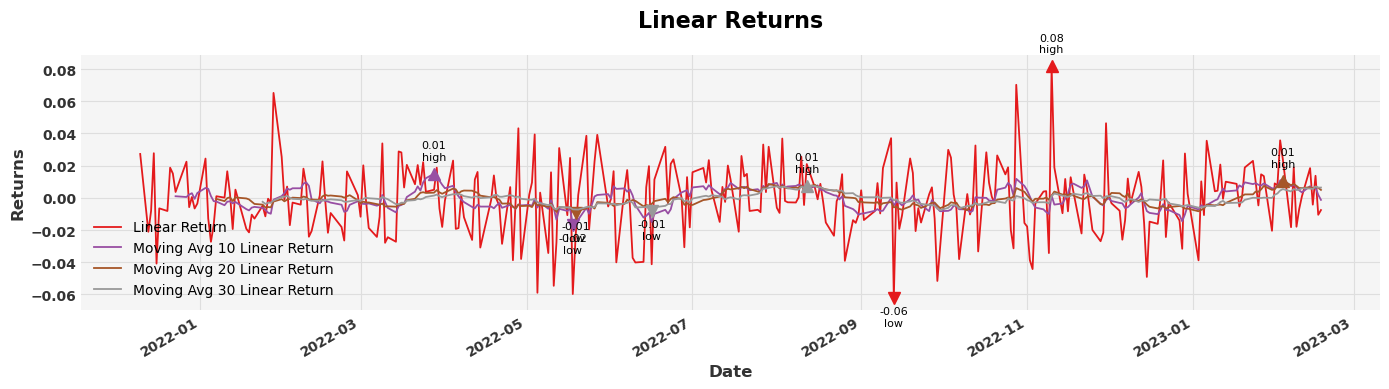

In [13]:
plot_time_series_annotated(aapl, ylabel='Returns', x_col='Date', y_cols=['Linear Return', 'Moving Avg 10 Linear Return', 'Moving Avg 20 Linear Return', 'Moving Avg 30 Linear Return'], title='Linear Returns')

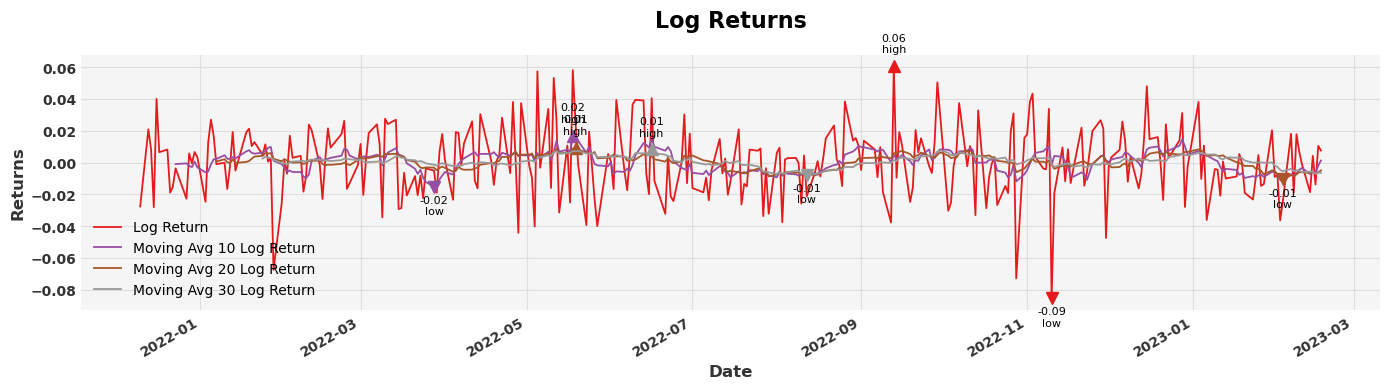

In [14]:
plot_time_series_annotated(aapl, ylabel='Returns', x_col='Date', y_cols=['Log Return', 'Moving Avg 10 Log Return', 'Moving Avg 20 Log Return', 'Moving Avg 30 Log Return'], title='Log Returns')

## Time Series Analysis [20 Points]
8. Define the auto-correlation function (for a stationary time-series) 

9. Compute the auto-correlation function (ACF) of the price time series 

10. Plot the price ACF 

11. Compute the partial auto-correlation function (PACF) of the price time series 

12. Plot the price PACF 

13. Compute the auto-correlation function (ACF) of the return time series 

14. Plot the return ACF 

15. Compute the partial auto-correlation function (PACF) of the return time series 

16. Plot the return PACF

In [15]:
def add_acf(df, col):
    """ 
    
    """
    df['Number of Lags'] = np.arange(df.shape[0]) 
    if col in ['Linear Return', 'Log Return']:
        df[f'{col} ACF'] = np.hstack((sm.tsa.acf(df[col][1:], nlags=df.shape[0]),0))
    else:
        df[f'{col} ACF'] = sm.tsa.acf(df[col], nlags=df.shape[0])

    return df

def add_pacf(df, col):
    """ 
    
    """

    pacf = sm.tsa.pacf(aapl['Close Price'], nlags=(aapl.shape[0]-1)//2)
    pacf_nan = np.hstack((pacf, np.full(aapl.shape[0] - pacf.shape[0], np.nan)))
    df[f'{col} PACF'] = pacf_nan
    return df


In [16]:
for col in ['Close Price', 'Linear Return', 'Log Return']:
    aapl = add_acf(aapl, col);
    aapl = add_pacf(aapl, col);


/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/2503752728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Lags'] = np.arange(df.shape[0])
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/2503752728.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col} ACF'] = sm.tsa.acf(df[col], nlags=df.shape[0])
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_97934/2503752728.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [17]:
aapl.head()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume Price,Date,Moving Avg 10,Moving Avg 20,Moving Avg 30,...,Moving Avg 20 Log Return,Moving Avg 30 Linear Return,Moving Avg 30 Log Return,Number of Lags,Close Price ACF,Close Price PACF,Linear Return ACF,Linear Return PACF,Log Return ACF,Log Return PACF
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.288162,108923700,2021-12-09,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.142532,115402700,2021-12-10,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.968483,0.971722,-0.028344,0.971722,-0.030018,0.971722
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.459564,153237000,2021-12-13,NaN,NaN,NaN,...,NaN,NaN,NaN,2,0.936991,-0.017283,-0.078125,-0.017283,-0.079745,-0.017283
2021-12-14,175.250000,177.740005,172.210007,174.330002,173.059845,139380400,2021-12-14,NaN,NaN,NaN,...,NaN,NaN,NaN,3,0.911270,0.086497,-0.012199,0.086497,-0.011816,0.086497
2021-12-15,175.110001,179.500000,172.309998,179.300003,177.993607,131063300,2021-12-15,NaN,NaN,NaN,...,NaN,NaN,NaN,4,0.886612,0.003958,-0.017736,0.003958,-0.020025,0.003958


In [18]:
def find_min_max(df, x_col, y_col):
    max_val = df[y_col].max()
    min_val = df[y_col].min()
    max_index = df[x_col][df[y_col] == max_val].iloc[0]
    min_index = df[x_col][df[y_col] == min_val].iloc[0]
    return max_val, min_val, max_index, min_index

In [19]:
def plot_correlation(df, x_col='Numer of Lags', y_col='Close Price ACF', facecolor='whitesmoke'):
    fig, ax = plt.subplots(figsize=(14,4))
    title=f'{y_col} vs. {x_col}'
    cmap = plt.cm.get_cmap('Set1', 2)

    if y_col == 'Close Price PACF':
        ax.stem(df[x_col][:150], df[y_col][:150], label=y_col[-4:])
        n = 150
    
    else:
        n= 300
        ax.stem(df[x_col], df[y_col], label=y_col[-4:])
         
    ax.set_ylabel(y_col)

    max_val, min_val, max_index, min_index = find_min_max(df, x_col, y_col)

    ax.plot(max_index, max_val, marker='^', markersize=8, color=cmap(0))
    ax.annotate(f"{max_val:.2f}\nhigh", xy=(max_index, max_val), xytext=(0, 5), 
            textcoords='offset points', ha='center', fontsize=6, fontweight='light')

    ax.plot(min_index, min_val, marker='v', markersize=8, color=cmap(0))
    ax.annotate(f"{min_val:.2f}\nlow", xy=(min_index, min_val-0.05), xytext=(0, -10), 
            textcoords='offset points', ha='center', fontsize=6, fontweight='light')
    
    ax.axhline(y=1.96/np.sqrt(n), linestyle='--', color='red', label='Threshold')
    ax.axhline(y=-1.96/np.sqrt(n), linestyle='--', color='red', label='Threshold')


    plt.title(title, loc='center', fontsize=16, fontweight='bold', pad=20)
    ax.set_facecolor(facecolor)
    ax.set_xlabel(x_col, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [20]:

def plot_correlation_returns(df, x_col='Number of Lags', y_cols=['Close Price ACF'], facecolor='whitesmoke'):
    num_plots = len(y_cols)
    fig, axs = plt.subplots(nrows=2, ncols=math.ceil(num_plots/2), figsize=(14,6))
    fig.suptitle(f'Apple: Correlation vs. {x_col}', fontsize=16, fontweight='bold', y=1.05)


    for i, y_col in enumerate(y_cols):
        row = i//2
        col = i%2
        ax = axs[row, col]

        if y_col[-4:] == 'PACF':
            ax.stem(df[x_col][:150], df[y_col][:150], color='black')
            
        else:
            ax.stem(df[x_col], df[y_col], color='black')


        ax.set_title(y_col, fontsize=12, fontweight='bold')
        ax.set_xlabel(x_col, fontsize=10, fontweight='bold')
        ax.set_ylabel(y_col, fontsize=10, fontweight='bold')
        ax.set_facecolor(facecolor)
        ax.tick_params(labelsize=8)

    plt.tight_layout()
    plt.show()


In [21]:
def plot_correlation_returns(df, x_col='Number of Lags', y_cols=['Close Price ACF'], facecolor='whitesmoke', hline=None):
    num_plots = len(y_cols)
    fig, axs = plt.subplots(nrows=2, ncols=math.ceil(num_plots/2), figsize=(14,6))
    
    for i, y_col in enumerate(y_cols):
        row = i//2
        col = i%2
        ax = axs[row, col]

        if y_col[-4:] == 'PACF':
            ax.stem(df[x_col][:150], df[y_col][:150], linefmt='k-', markerfmt='ko', basefmt='k-')
            n=150
        else:
            ax.stem(df[x_col], df[y_col], linefmt='k-', markerfmt='ko', basefmt='k-')
            n=300
        
        ax.axhline(y=1.96/np.sqrt(n), linestyle='--', color='red',)
        ax.axhline(y=-1.96/np.sqrt(n), linestyle='--', color='red')

        ax.set_title(y_col, fontsize=12, fontweight='bold')
        ax.set_xlabel(x_col, fontsize=10, fontweight='bold')
        ax.set_ylabel(y_col, fontsize=10, fontweight='bold')
        ax.set_facecolor(facecolor)
        ax.tick_params(labelsize=8)

    plt.tight_layout()
    plt.show()


In [22]:
def linear_against_log(df):
    fig, ax = plt.subplots(figsize=(10,4))
    cmap  = plt.cm.get_cmap('Set1', 2)
    ax.scatter(df['Linear Return'], df['Log Return'], color=cmap(1), marker='x', label='log vs linear')
    ax.plot((-0.08,0.08), (0.08,-0.08), linestyle='--', color=cmap(0))
    ax.set_xlabel('Linear Return')
    ax.set_ylabel('Log Return')
    ax.set_facecolor('whitesmoke')
    


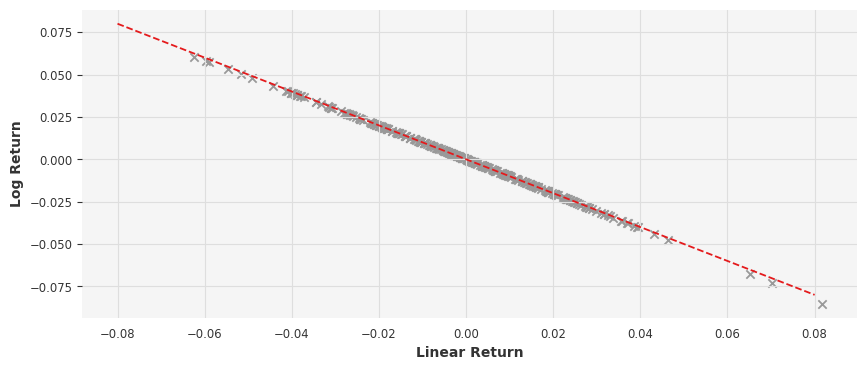

In [23]:
linear_against_log(aapl)

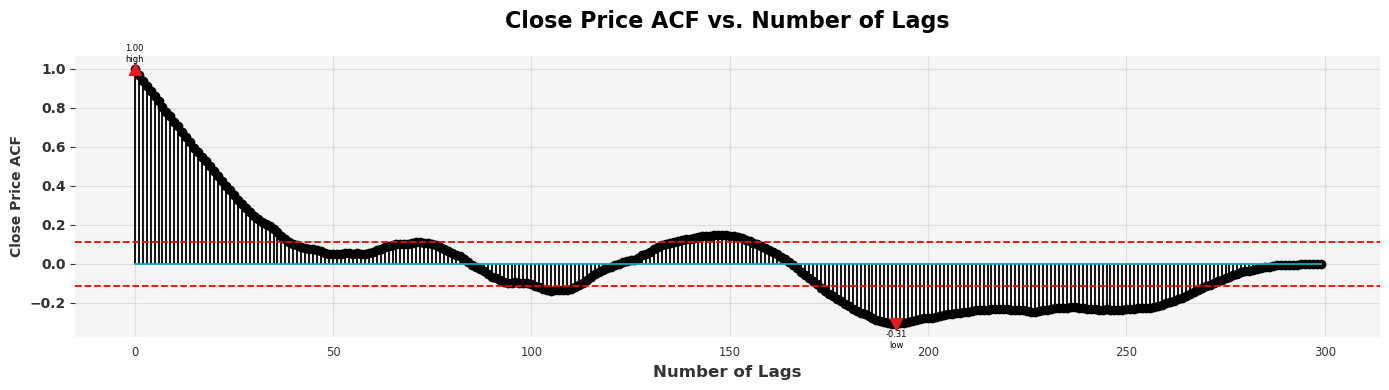

In [24]:
plot_correlation(aapl, x_col='Number of Lags', y_col='Close Price ACF')

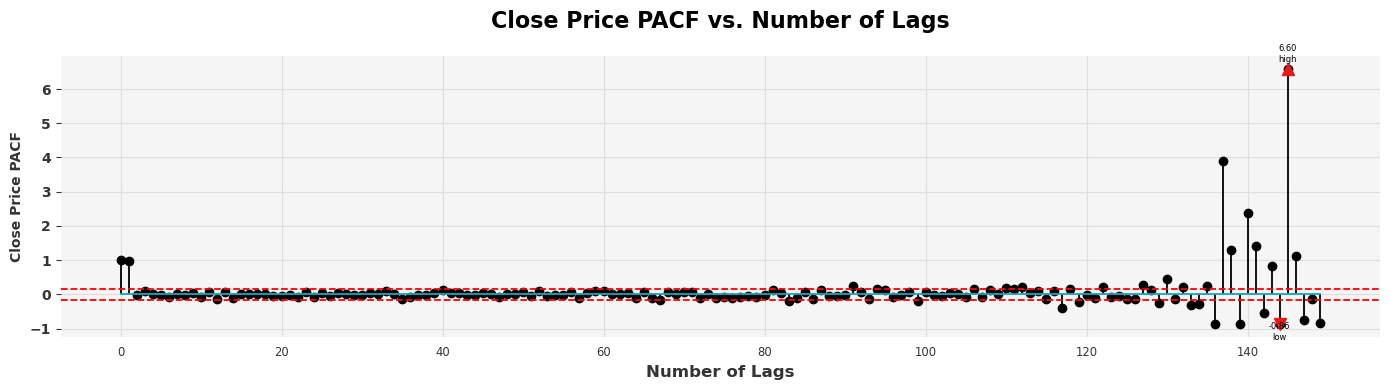

In [25]:
plot_correlation(aapl, x_col='Number of Lags', y_col='Close Price PACF')

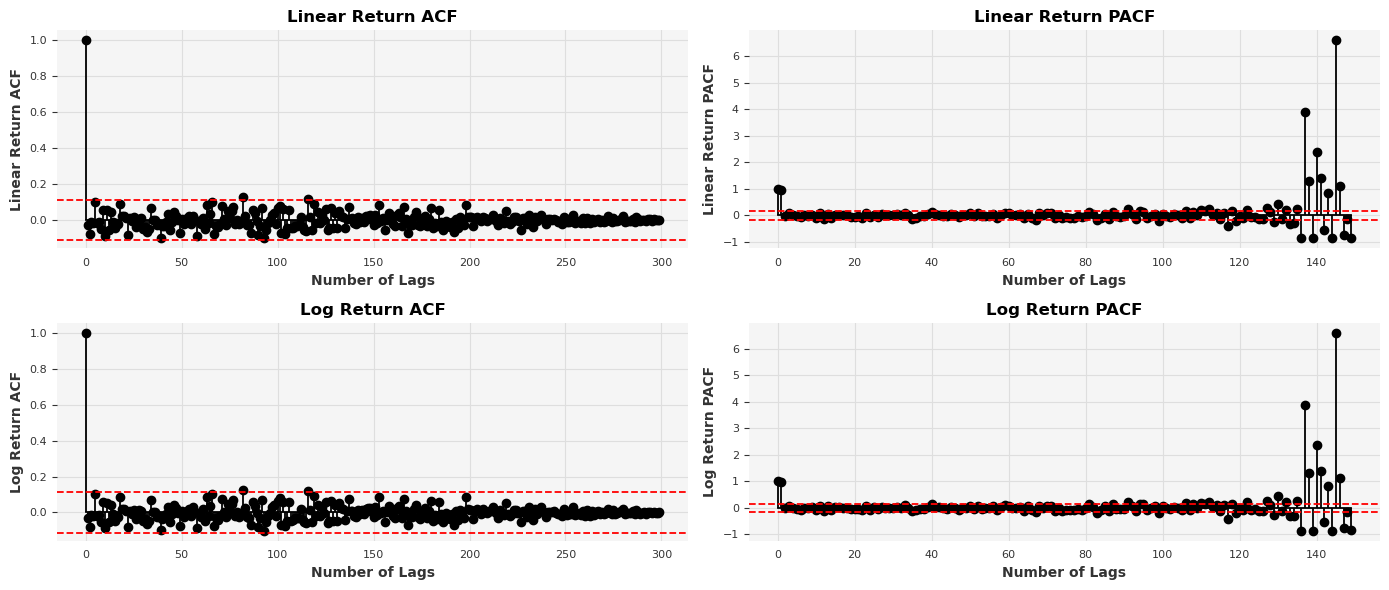

In [26]:
plot_correlation_returns(aapl, y_cols=['Linear Return ACF', 'Linear Return PACF', 'Log Return ACF','Log Return PACF'])

## ARMA models
17. Define mathematically an ARMA(p,q) model 

18. Define a training and test set and fit an ARMA model to the price time series 

19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set 

20. Plot the price time series vs the ARMA forecast in the test set 

21. Fit an ARMA model to the return time series 

22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set 

23. Plot the return time series vs the ARMA forecast in the test set

In [27]:
aapl.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price',
       'Adj Close Price', 'Volume Price', 'Date', 'Moving Avg 10',
       'Moving Avg 20', 'Moving Avg 30', 'Linear Return', 'Log Return',
       'Moving Avg 10 Linear Return', 'Moving Avg 10 Log Return',
       'Moving Avg 20 Linear Return', 'Moving Avg 20 Log Return',
       'Moving Avg 30 Linear Return', 'Moving Avg 30 Log Return',
       'Number of Lags', 'Close Price ACF', 'Close Price PACF',
       'Linear Return ACF', 'Linear Return PACF', 'Log Return ACF',
       'Log Return PACF'],
      dtype='object')

In [28]:
aapl = aapl.set_index(pd.RangeIndex(start=0, stop=aapl.shape[0], step=1, name=None))
aapl = aapl.drop('Date', axis=1)

In [29]:
aapl_time_series = darts.TimeSeries.from_dataframe(aapl)
close_price_time_series = aapl_time_series['Close Price']
log_return_time_series = aapl_time_series['Log Return'][1:] #removing nan
linear_return_time_series = aapl_time_series['Linear Return'][1:] # removing nan
len(close_price_time_series), len(log_return_time_series), len(linear_return_time_series)

(300, 299, 299)

In [30]:
proportion = 0.9

close_price_train, close_price_test = close_price_time_series.split_before(proportion)
log_return_train, log_return_test = log_return_time_series.split_before(proportion)
linear_return_train, linear_return_test = linear_return_time_series.split_before(proportion)

In [32]:
from itertools import product

def gridsearch_and_fit(series, val_series, parameters, d=0, metric=metrics.mse):
    param_combinations = list(product(*parameters.values()))
    results = []
    for params in param_combinations:
        arima = ARIMA(p=params[0], d=d, q=params[1])
        arima.fit(series=series)
        pred = arima.predict(len(val_series))
        error = metric(val_series, pred)
        results.append((params, error))
        print(f"Parameters: {params}; Error: {error}")
    return results



In [33]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


parameters_close_price = {
    "p": [1,2,],
    "q": [1,2,50] 
}

parameters_return = {
    "p": [1, 2],
    "q": [1, 2]
}


results_close_price = gridsearch_and_fit(close_price_train, close_price_test, parameters_close_price)
results_log_return = gridsearch_and_fit(log_return_train, log_return_test, parameters_return)
results_linear_return = gridsearch_and_fit(linear_return_train, linear_return_test, parameters_return)


Parameters: (1, 1); Error: 103.7302697118565
Parameters: (1, 2); Error: 131.9386327271959


/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters: (1, 50); Error: 41.47400757065586
Parameters: (2, 1); Error: 86.78950387175402


/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters: (2, 2); Error: 121.83404739423156


/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters: (2, 50); Error: 37.24963942589588
Parameters: (1, 1); Error: 0.0002644867983064314
Parameters: (1, 2); Error: 0.00027142268206356964
Parameters: (2, 1); Error: 0.000270258640448964
Parameters: (2, 2); Error: 0.0002713846150225698
Parameters: (1, 1); Error: 0.000263857213784032
Parameters: (1, 2); Error: 0.00027024594941079083
Parameters: (2, 1); Error: 0.00026907342817385725
Parameters: (2, 2); Error: 0.00027025281759292344


In [34]:
results_close_price

[((1, 1), 103.7302697118565),
 ((1, 2), 131.9386327271959),
 ((1, 50), 41.47400757065586),
 ((2, 1), 86.78950387175402),
 ((2, 2), 121.83404739423156),
 ((2, 50), 37.24963942589588)]

In [35]:
results_log_return

[((1, 1), 0.0002644867983064314),
 ((1, 2), 0.00027142268206356964),
 ((2, 1), 0.000270258640448964),
 ((2, 2), 0.0002713846150225698)]

In [36]:
results_linear_return

[((1, 1), 0.000263857213784032),
 ((1, 2), 0.00027024594941079083),
 ((2, 1), 0.00026907342817385725),
 ((2, 2), 0.00027025281759292344)]

In [37]:
arima_close_price = ARIMA(p=2, d=0, q=50)
arima_close_price.fit(series=close_price_train)

arima_log_return = ARIMA(p=1, d=0, q=1)
arima_log_return.fit(series=log_return_train)

arima_linear_return = ARIMA(p=1, d=0, q=1)
arima_linear_return.fit(series=linear_return_train)

/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [38]:
pred_close_price = arima_close_price.predict(n=len(close_price_test))
pred_log_return = arima_log_return.predict(n=len(log_return_test))
pred_linear_return =  arima_linear_return.predict(n=len(linear_return_test))

In [39]:
pred_linear_return.values().reshape(-1).shape

(31,)

In [40]:
pred_linear_return.time_index

RangeIndex(start=269, stop=300, step=1, name='time')

In [41]:
def plot_prediction(ground_truth, pred_train, prediction_series, p, q, series_name='Close Price'):
    cmap = plt.cm.get_cmap('Set1', 2)
    model = sm.tsa.ARIMA(pred_train.values(), order=(p,0, q))
    residuals = model.fit().resid

    se = residuals.std()

    ci_upper = prediction_series.values().reshape(-1) + 1.96 * se
    ci_lower = prediction_series.values().reshape(-1) - 1.96 * se

    prediction_series.plot(label='Prediction', color=cmap(0))
    ground_truth.plot(label='Ground Truth', color=cmap(1))
    plt.fill_between(prediction_series.time_index, ci_lower, ci_upper, color='blue', alpha=0.1, label ='95% Confidence Interval')
    plt.ylabel(series_name)
    plt.legend()
    plt.title(f'ARMA model {series_name}: p={p}, q={q}')
    plt.rcParams["figure.figsize"] = (13,3)
    plt.show()


In [42]:
# def plot_prediction(ground_truth, prediction_series, result, p, q, series_name='Close Price'):
#     cmap = plt.cm.get_cmap('Set1', 2)

#     prediction_series.plot(label='Prediction', color=cmap(0))
#     ground_truth.plot(label='Ground Truth', color=cmap(1))
#     plt.ylabel('Close Price ($)')
#     plt.title(f'ARMA model {series_name}: p={p}, q={q}')
#     plt.rcParams["figure.figsize"] = (13,3)
#     plt.show()

/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


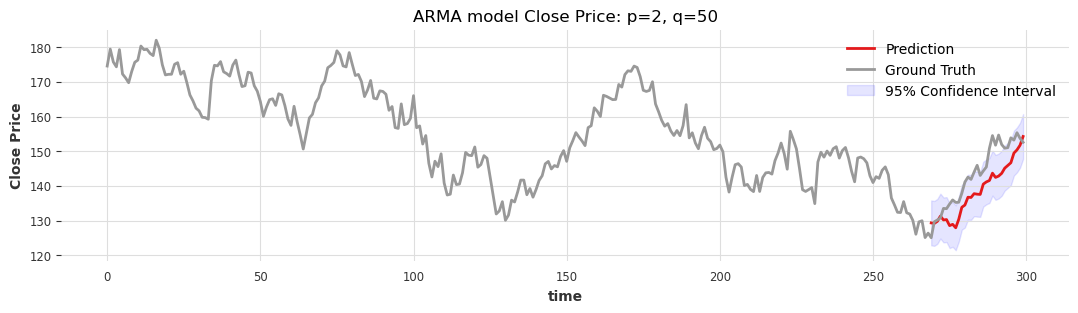

In [54]:
plot_prediction(close_price_time_series, close_price_train, pred_close_price, p=2, q=50, series_name='Close Price')

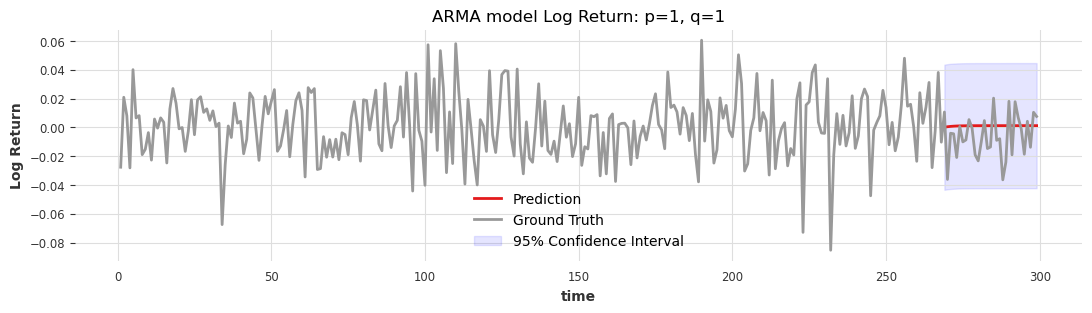

In [44]:
plot_prediction(log_return_time_series, log_return_train, pred_log_return, p=1, q=1, series_name='Log Return')

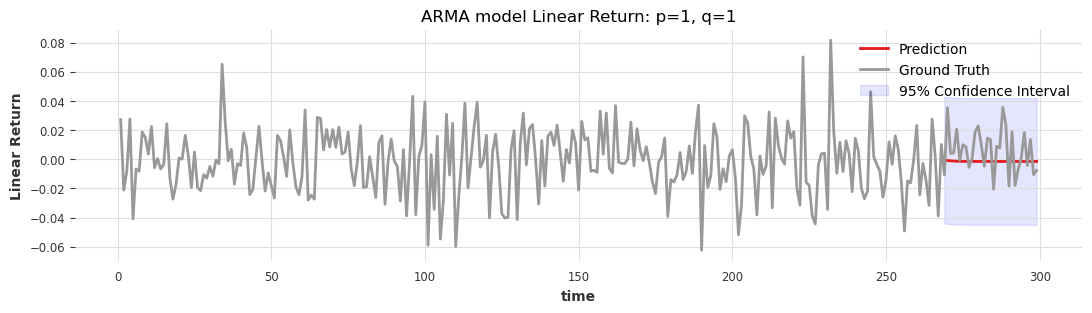

In [45]:
plot_prediction(linear_return_time_series, linear_return_train, pred_linear_return, p=1,q=1, series_name='Linear Return')

## Gaussianity and Stationarity test [20 Points]

24. Introduce mathematically a Gaussianity test 

25. Perform a Gaussianity test of the return time series 

26. Introduce mathematically a stationarity test 

27. Perform a stationarity test of the return time series

In [46]:
def shapiro_wilk_test(data):
    stat, p = shapiro(data)
    print(stat, p)
    alpha = 0.01
    if p > alpha:
        print("Data is normally distributed (fail to reject H0) at 0.01 significance level")
    else:
        print("Data is not normally distributed (reject H0) at 0.01 significance level")

    alpha = 0.05
    if p > alpha:
        print("Data is normally distributed (fail to reject H0) at 0.05 significance level")
    else:
        print("Data is not normally distributed (reject H0) at 0.05 significance level")


In [47]:
shapiro_wilk_test(log_return_time_series.values())

0.9900210499763489 0.03893101587891579
Data is normally distributed (fail to reject H0) at 0.01 significance level
Data is not normally distributed (reject H0) at 0.05 significance level


In [48]:
shapiro_wilk_test(linear_return_time_series.values())

0.9910749197006226 0.0666414275765419
Data is normally distributed (fail to reject H0) at 0.01 significance level
Data is normally distributed (fail to reject H0) at 0.05 significance level


In [49]:
shapiro_wilk_test(close_price_time_series.values())

0.9712116718292236 1.0338369065721054e-05
Data is not normally distributed (reject H0) at 0.01 significance level
Data is not normally distributed (reject H0) at 0.05 significance level


In [61]:
def adf_test(data, alpha =0.05):
    idx = np.isfinite(data)
    data = data[idx]
    result = adfuller(data, autolag='AIC', regression='c', maxlag=None)

    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Set the null hypothesis that the time series is non-stationary
    null_hypothesis = "The time series is non-stationary."

    if p_value < alpha:
        print(f"Fail to reject null hypothesis. The time series is stationary (at {alpha} significance level). Test statistic = {adf_stat}, P-value = {p_value}")
    else:
        print(f"Reject the null hypothesis. {null_hypothesis} (at {alpha} significance level). Test statistic = {adf_stat}, P-value = {p_value}")



In [62]:
adf_test(close_price_time_series.values())

Reject the null hypothesis. The time series is non-stationary. (at 0.05 significance level). Test statistic = -2.3088271434294465, P-value = 0.16913684518101768


In [63]:
adf_test(log_return_time_series.values())

Fail to reject null hypothesis. The time series is stationary (at 0.05 significance level). Test statistic = -17.776103194492926, P-value = 3.2919518766258296e-30


In [64]:
adf_test(linear_return_time_series.values())

Fail to reject null hypothesis. The time series is stationary (at 0.05 significance level). Test statistic = -17.746049146202022, P-value = 3.385902344634076e-30
